Liste des points : [(500.0, 500.0), (481, 69), (896, 159), (719, 783), (863, 917), (123, 33), (28, 178), (525, 682), (396, 498), (897, 127), (230, 98), (476, 539), (897, 188), (637, 734), (125, 720), (757, 636), (576, 253), (878, 401), (208, 562), (825, 402), (277, 527)]
Matrice d'adjacence 
 [[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.

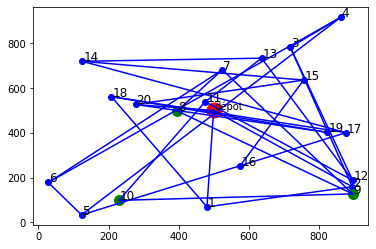

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 50*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1

            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 20
nbvoisins = 3

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
randomPackages(3, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


Liste des points : [(125.0, 125.0), (182, 222), (11, 10), (189, 176), (101, 95), (64, 119)]
Matrice d'adjacence 
 [[0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]]
Matrice d'adjacence pondérée 
 [[  0. 113.   0.  82.   0.  61.]
 [113.   0. 272.   0.   0.   0.]
 [  0. 272.   0. 243.   0. 121.]
 [ 82.   0. 243.   0. 120.   0.]
 [  0.   0.   0. 120.   0.  44.]
 [ 61.   0. 121.   0.  44.   0.]]
go
liste livraison: [4, 3, 2]
liste parcourus: [0]
iteration while
2
1
1
list a ajouter[[0, 5]]
indiceMini a ajouter:5
[0, []]
[0]
looking in[0, []]
jai trouve une solution
PATH [0]
path 1


TypeError: 'int' object is not iterable

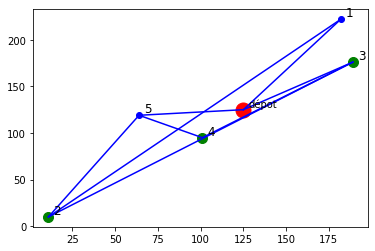

In [40]:
#verif la presence de tous les elements de la table1 dans la table 2
import time

def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(not(e in TableauEntier)):
            return False
    return True
    
def lookPathInTree(n, arbreLocation, path): #recursivité pour chercher un chemin vers un point dans l'arbre de PCM
    print("looking in"+ str(arbreLocation))
    if(n == arbreLocation[0]):
        print("jai trouve une solution")
        path = [n]
        print("PATH "+ str(path))
        return 1
    if(arbreLocation[1] == []):
        print("aaaaaaaaaaaaaaaaah")
        return 0
    for i in range(len(arbreLocation[1])):
            ret = lookPathInTree(n,arbreLocation[1][i])
            if (ret != 0):
                path.insert(0,arbreLocation[0])
    return path

def insertIntoArbre(arbre,path,n):
    currentArbre = arbre
    print("path "+ str(path))
    for p in path:
        #print(arbre)
        #print(currentArbre)
        for child in currentArbre[1]:
            if p == child[0]:
                currentArbre = child
    currentArbre[1].append([n,[]])
            
    
    
def solutionLocaleTree(matrice, liste_pt_livraisons):
    indice_depot = 0
    liste_parcourus = [indice_depot]
    livraisons = liste_pt_livraisons
    arbre = [indice_depot,[]]
    while(not(verifPresenceElemtable1_In_table2(livraisons,liste_parcourus))):
        print("liste livraison: " +str(livraisons))
        print("liste parcourus: " +str(liste_parcourus))
        print("iteration while")
        liste_tuple_pointValeur_minimum = []
        PointVoisinDuRetenu = None #point a cote du minimal dans le cas ou on a deja plus d un pt dans l arbre
        for p in liste_parcourus:
            valeur_minimum = 0
            indice_minimum = None
            for j in range(len(matrice[p])):
                if((matrice[p][j] > 0) and (matrice[p][j] < valeur_minimum) and (not(j in liste_parcourus) and (indice_minimum != None))):
                    print("1")
                    valeur_minimum = matrice[p][j]
                    indice_minimum = j
                    #on ajoute juste le choisi au minimum des p, FIN CE CETTE BOUCLE sinn on est bz
                    
                elif((matrice[p][j] > 0) and (indice_minimum == None) and (not(j in liste_parcourus))):
                    print("2")
                    valeur_minimum = matrice[p][j]
                    indice_minimum = j
            if(indice_minimum != None):
                liste_tuple_pointValeur_minimum.append([p,indice_minimum])
            #choix dans la liste de tuple du mini et on ajoute dans arbre+listeparcouru
        minimumArbreGlobal = 0
        IndicePointAAjouter = 0
        print( "list a ajouter" + str(liste_tuple_pointValeur_minimum))
        #print(liste_tuple_pointValeur_minimum)
        for m in range(len(liste_tuple_pointValeur_minimum)):
            #print("miniglobal " + str(minimumArbreGlobal))
            #print("indiceminiglobal " + str(IndicePointAAjouter))
            if m == 0:
                minimumArbreGlobal = matrice[liste_tuple_pointValeur_minimum[m][0]][liste_tuple_pointValeur_minimum[m][1]] #vu que dans la liste il y a des elems indices de type [i,j]
                IndicePointAAjouter = m
                PointVoisinDuRetenu = liste_tuple_pointValeur_minimum[m][0]
            elif (matrice[liste_tuple_pointValeur_minimum[m][0]][liste_tuple_pointValeur_minimum[m][1]] < minimumArbreGlobal):
                minimumArbreGlobal = matrice[liste_tuple_pointValeur_minimum[m][0]][liste_tuple_pointValeur_minimum[m][1]] #vu que dans la liste il y a des elems indices de type [i,j]
                IndicePointAAjouter = m
                PointVoisinDuRetenu = liste_tuple_pointValeur_minimum[m][0]
        print("indiceMini a ajouter:" + str(liste_tuple_pointValeur_minimum[IndicePointAAjouter][1]))
        
        print(arbre)
        print(liste_parcourus)
        #print("path"+ str(lookPathInTree(liste_tuple_pointValeur_minimum[m][0], arbre)))
        insertIntoArbre(arbre,lookPathInTree(liste_tuple_pointValeur_minimum[IndicePointAAjouter][0], arbre, []), liste_tuple_pointValeur_minimum[IndicePointAAjouter][1])
        liste_parcourus.append(liste_tuple_pointValeur_minimum[IndicePointAAjouter][1])
    
    return arbre
                    
        
            #verifier le minimum et le mettre avec le bon indice dans la matrice, l'indice ligne et colonne qu'on voie

            
nbPoints = 5
pointList = pointGeneration(nbPoints) 
print("Liste des points :", pointList)

plotPoints(pointList)
packages = randomPackages(3, nbPoints)
nbvoisins = 3
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)

time.sleep(5)
print("go")
print(solutionLocaleTree(matrix, packages))
        